In [60]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from cv2 import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
val_path=r"C:\\Users\\User\\Downloads\\Klasifikasi varietas sayur kol\\validation"
train_path=r"C:\\Users\\User\\Downloads\\Klasifikasi varietas sayur kol\\train"

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                               seed=2509,
                                                               image_size=(224, 224),
                                                              batch_size=32)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_path,
                                                              seed=2509,
                                                              image_size=(224, 224),
                                                              shuffle=False,
                                                              batch_size=32)

Found 198 files belonging to 4 classes.
Found 40 files belonging to 4 classes.


In [6]:
class_names = train_dataset.class_names
print(len(class_names))

4


In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(class_names),activation='softmax'))

In [8]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [9]:
history = model.fit(x=train_dataset,
                    epochs= 20,
                    validation_data=val_dataset)

Epoch 1/20
7/7 [==============================] - 28s 3s/step - loss: 1.4760 - accuracy: 0.4444 - val_loss: 17.1728 - val_accuracy: 0.2500
Epoch 2/20
7/7 [==============================] - 16s 2s/step - loss: 0.7089 - accuracy: 0.7677 - val_loss: 10.3935 - val_accuracy: 0.2500
Epoch 3/20
7/7 [==============================] - 16s 2s/step - loss: 0.5460 - accuracy: 0.8232 - val_loss: 5.2296 - val_accuracy: 0.3250
Epoch 4/20
7/7 [==============================] - 16s 2s/step - loss: 0.3413 - accuracy: 0.9242 - val_loss: 7.5251 - val_accuracy: 0.2750
Epoch 5/20
7/7 [==============================] - 16s 2s/step - loss: 0.2571 - accuracy: 0.9091 - val_loss: 7.7771 - val_accuracy: 0.3500
Epoch 6/20
7/7 [==============================] - 17s 2s/step - loss: 0.1970 - accuracy: 0.9394 - val_loss: 5.0094 - val_accuracy: 0.3750
Epoch 7/20
7/7 [==============================] - 16s 2s/step - loss: 0.1413 - accuracy: 0.9646 - val_loss: 3.4183 - val_accuracy: 0.3250
Epoch 8/20
7/7 [================

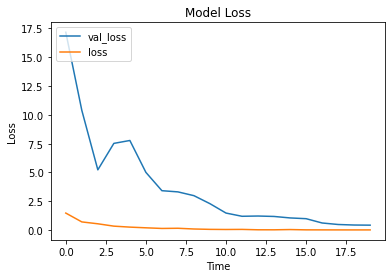

In [10]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Time')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

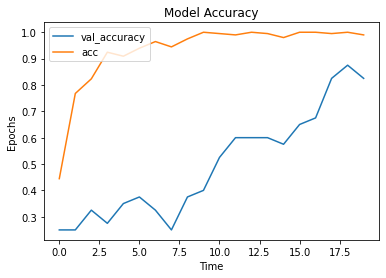

In [11]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Epochs")
plt.xlabel('Time')
plt.legend(['val_accuracy', 'acc'], loc='upper left')
plt.show()

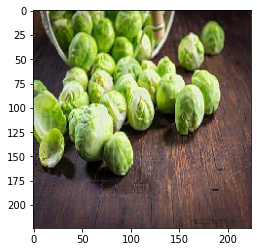

1/1 [==============================] - 0s 54ms/step
Actual: C:\Users\User\Downloads\Klasifikasi varietas sayur kol\test\Brussel sprouts\Image_2.jpg
Predicted: Brussel sprouts


In [18]:
from keras_preprocessing import image
image_path="C:\\Users\\User\\Downloads\\Klasifikasi varietas sayur kol\\test\\Brussel sprouts\\Image_2.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-1])
print("Predicted: "+class_names[np.argmax(pred)])

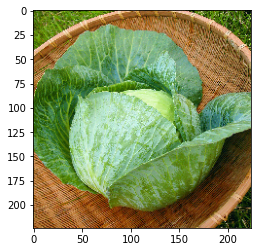

1/1 [==============================] - 0s 54ms/step
Actual: C:\Users\User\Downloads\Klasifikasi varietas sayur kol\test\Kubis\Image_1.jpg
Predicted: Kubis


In [19]:
from keras_preprocessing import image
image_path="C:\\Users\\User\\Downloads\\Klasifikasi varietas sayur kol\\test\\Kubis\\Image_1.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-1])
print("Predicted: "+class_names[np.argmax(pred)])

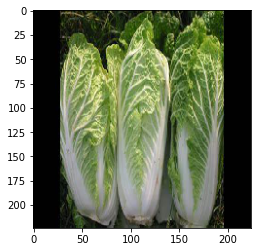

1/1 [==============================] - 0s 48ms/step
Actual: C:\Users\User\Downloads\Klasifikasi varietas sayur kol\test\Napa cabbage\Image_6.jpg
Predicted: Napa cabbage


In [27]:
from keras_preprocessing import image
image_path="C:\\Users\\User\\Downloads\\Klasifikasi varietas sayur kol\\test\\Napa cabbage\\Image_6.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-1])
print("Predicted: "+class_names[np.argmax(pred)])

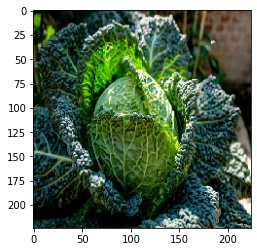

1/1 [==============================] - 0s 50ms/step
Actual: C:\Users\User\Downloads\Klasifikasi varietas sayur kol\test\Savoy cabbage\Image_3.jpg
Predicted: Savoy cabbage


In [29]:
from keras_preprocessing import image
image_path="C:\\Users\\User\\Downloads\\Klasifikasi varietas sayur kol\\test\\Savoy cabbage\\Image_3.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print("Actual: "+image_path.split("/")[-1])
print("Predicted: "+class_names[np.argmax(pred)])